In [1]:
import shutil
import numpy as np
import pandas as pd
import numpy.typing as npt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

params = {
    "figure.figsize": [9, 6],
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "axes.titlepad": 15,
    "font.size": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "text.usetex": True if shutil.which("latex") else False,
    "font.family": "serif",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.top": True,
    "ytick.left": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.minor.size": 2.5,
    "xtick.major.size": 5,
    "ytick.minor.size": 2.5,
    "ytick.major.size": 5,
    "axes.axisbelow": True,
    "figure.dpi": 200,
}
plt.rcParams.update(params)

# **Main Rotor**

### **Fit using "True" values we get from code**

In [2]:
def emperical_function(
    x: npt.NDArray,
    kappa: npt.NDArray | float,
    Cd0: npt.NDArray | float,
    four_point_six: npt.NDArray | float,
):
    """
    Empirical function to fit the data

    Parameters
    ----------
    x : array_like
        The input data in the form [x1, x2, x3, x4]
    kappa : float
        The coefficient of the first term
    Cd0 : float
        The coefficient of the second term
    four_point_six : float

    Returns
    -------
    float
        The output of the function
    """
    x1, x2, x3, x4 = x
    return x1 * kappa + x2 + x3 * Cd0 * (1 + four_point_six * x4)


data = pd.read_csv("data/trim_curve.csv")
x1 = (data["Cp(Main Rotor)"] * data["true_Lambda_i"]).to_numpy()
x2 = data["true_Cp_parasite"].to_numpy()
x3 = data["solidity(Main Rotor)"].to_numpy() / 8
x4 = (data["true_mu"].to_numpy()) ** 2

y = data["Cp(Main Rotor)"].to_numpy()

x = np.vstack((x1, x2, x3, x4)).T
popt, pcov = curve_fit(emperical_function, x.T, y)
kappa, Cd0, four_point_six = popt
print("")
print(f"kappa: {kappa}\nCd0: {Cd0}\n4.6: {four_point_six}")

for i in range(len(y)):
    y_hat = emperical_function(
        np.array([x1[i], x2[i], x3[i], x4[i]]), kappa, Cd0, four_point_six
    )
    print(
        f"y: {y[i]}, y_hat: {y_hat}, percentage error: {(abs(y[i] - y_hat) / y[i]):.2%}"
    )


kappa: 3.8111992477224836
Cd0: 0.4725845364465615
4.6: 122.32072767882481
y: 0.0075954919546504, y_hat: 0.007649785140545231, percentage error: 0.71%
y: 0.0071767023706422, y_hat: 0.006955332673762038, percentage error: 3.08%
y: 0.0076665499529374, y_hat: 0.007793015836330479, percentage error: 1.65%
y: 0.0068625765582748, y_hat: 0.006903065460192497, percentage error: 0.59%
y: 0.0081071327598548, y_hat: 0.00796817874663925, percentage error: 1.71%
y: 0.0065398300349164, y_hat: 0.006577154756928172, percentage error: 0.57%
y: 0.0079835485654891, y_hat: 0.008015942033298522, percentage error: 0.41%
y: 0.0065827843454155, y_hat: 0.006652141900256042, percentage error: 1.05%


### **Fit using Low Fidelity values -- these are the values we will have to use in mission planner anyways**

In [3]:
def emperical_function(
    x: npt.NDArray,
    kappa: npt.NDArray | float,
    Cd0: npt.NDArray | float,
    four_point_six: npt.NDArray | float,
):
    """
    Empirical function to fit the data

    Parameters
    ----------
    x : array_like
        The input data in the form [x1, x2, x3, x4]
    kappa : float
        The coefficient of the first term
    Cd0 : float
        The coefficient of the second term
    four_point_six : float

    Returns
    -------
    float
        The output of the function
    """
    x1, x2, x3, x4 = x
    return x1 * kappa + x2 + x3 * Cd0 * (1 + four_point_six * x4)


data = pd.read_csv("data/trim_curve.csv")
x1 = (data["Cp(Main Rotor)"] * data["lf_Lambda_i"]).to_numpy()
x2 = data["lf_Cp_parasite"].to_numpy()
x3 = data["solidity(Main Rotor)"].to_numpy() / 8
x4 = (data["lf_mu"].to_numpy()) ** 2

y = data["Cp(Main Rotor)"].to_numpy()

x = np.vstack((x1, x2, x3, x4)).T
popt, pcov = curve_fit(emperical_function, x.T, y)
kappa, Cd0, four_point_six = popt
print("")
print(f"kappa: {kappa}\nCd0: {Cd0}\n4.6: {four_point_six}")

for i in range(len(y)):
    y_hat = emperical_function(
        np.array([x1[i], x2[i], x3[i], x4[i]]), kappa, Cd0, four_point_six
    )
    print(
        f"y: {y[i]}, y_hat: {y_hat}, percentage error: {(abs(y[i] - y_hat) / y[i]):.2%}"
    )


kappa: 25.848762468134435
Cd0: 0.4834611238167261
4.6: 139.52059332128192
y: 0.0075954919546504, y_hat: 0.00766675455412745, percentage error: 0.94%
y: 0.0071767023706422, y_hat: 0.0069002327880869525, percentage error: 3.85%
y: 0.0076665499529374, y_hat: 0.007825908149087376, percentage error: 2.08%
y: 0.0068625765582748, y_hat: 0.006908235062835827, percentage error: 0.67%
y: 0.0081071327598548, y_hat: 0.007909946266417134, percentage error: 2.43%
y: 0.0065398300349164, y_hat: 0.006584999608594998, percentage error: 0.69%
y: 0.0079835485654891, y_hat: 0.008014613482764495, percentage error: 0.39%
y: 0.0065827843454155, y_hat: 0.006703926635866228, percentage error: 1.84%


# **Tail Rotor**

Parameters of the linear fit: m: 3.1310317968129366, c: 0.013284104393333355
y: 0.0369700167939639, y_hat: 0.0370658312157806, percentage error: 0.26%
y: 0.035720909929493, y_hat: 0.03575458771207687, percentage error: 0.09%
y: 0.0374415221995968, y_hat: 0.03728831606783508, percentage error: 0.41%
y: 0.0349539636732213, y_hat: 0.034771049805354844, percentage error: 0.52%
y: 0.0387460038540504, y_hat: 0.03866779484542255, percentage error: 0.20%
y: 0.0337292281446484, y_hat: 0.03376052017840886, percentage error: 0.09%
y: 0.0381232594790299, y_hat: 0.03828084880328003, percentage error: 0.41%
y: 0.033799056043766, y_hat: 0.03389501149039172, percentage error: 0.28%


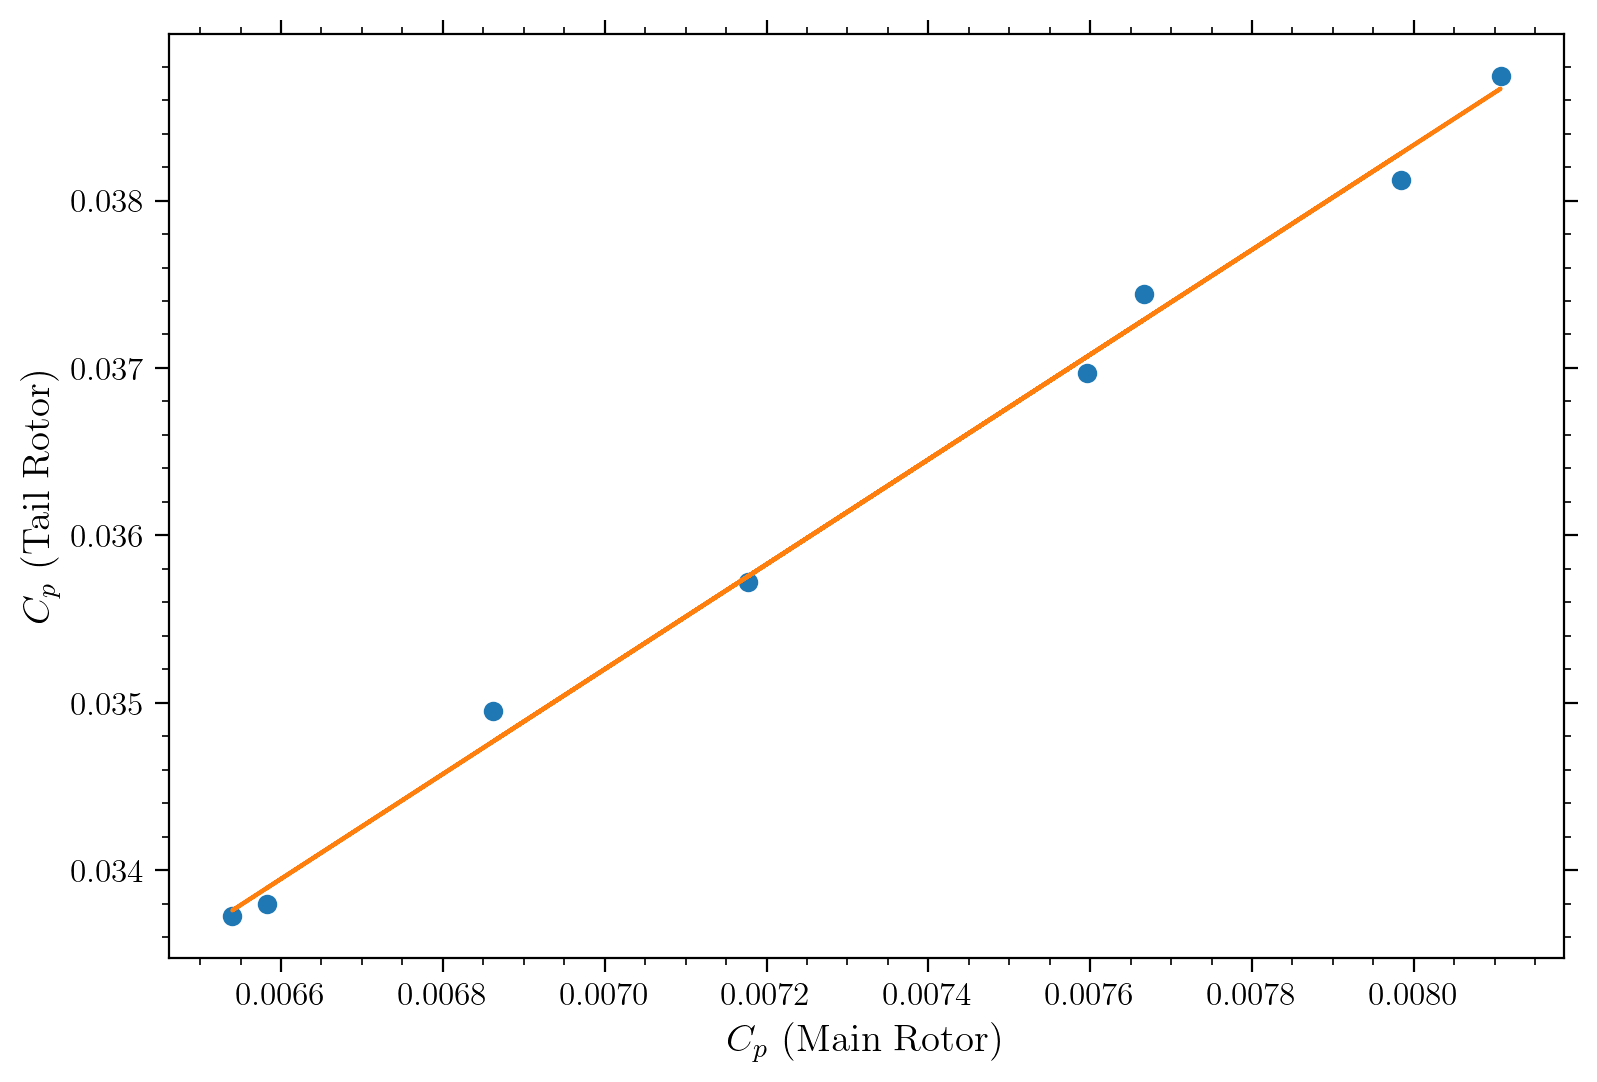

In [4]:
def linear(x, m, c):
    return m * x + c


x = data["Cp(Main Rotor)"]
y = data["Cp(Tail Rotor)"]
popt, pcov = curve_fit(linear, x, y)
m, c = popt

print(f"Parameters of the linear fit: m: {m}, c: {c}")
for i in range(len(y)):
    y_hat = linear(x[i], *popt)
    print(
        f"y: {y[i]}, y_hat: {y_hat}, percentage error: {(abs(y[i] - y_hat) / y[i]):.2%}"
    )

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, "o")
ax.plot(x, linear(x, *popt))
ax.set_xlabel("$C_p$ (Main Rotor)")
ax.set_ylabel("$C_p$ (Tail Rotor)")
plt.show()